In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
os.chdir('..')
from scripts.project_functions import load_and_process
from scripts.project_functions import add_medalpts

In [3]:
df = load_and_process("../data/raw/Summer-Olympic-medals-1976-to-2008 2.csv")
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:

add_medalpts(df)
df = df.copy().drop(['Country_Code', 'City', 'Athlete'], axis=1)
df.head()


,Year,Sport,Discipline,Event,Gender,Country,Event_gender,Medal,Medal_Points
0,1976.0,Aquatics,Diving,3m springboard,Women,East Germany,W,Silver,2
1,1976.0,Aquatics,Diving,3m springboard,Men,Soviet Union,M,Bronze,1
2,1976.0,Aquatics,Diving,3m springboard,Men,United States,M,Gold,4
3,1976.0,Aquatics,Diving,3m springboard,Men,Italy,M,Silver,2
4,1976.0,Aquatics,Diving,10m platform,Women,United States,W,Bronze,1


In [5]:
df.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
Year,15316.0,1993.620789,10.159851,1976.0,1984.0,1996.0,2004.0,2008.0
Medal_Points,15316.0,2.315095,1.249364,1.0,1.0,2.0,4.0,4.0


In [27]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Sport,15316,28,Aquatics,2210
Discipline,15316,41,Athletics,1523
Event,15316,293,hockey,817
Gender,15316,2,Men,9388
Country,15316,127,United States,1992
Event_gender,15316,3,M,8817
Medal,15316,3,Bronze,5258


In [187]:
import pandas_profiling as pdp
df.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
anualpts = (df.groupby(['Country', 'Year']).Medal_Points.sum()
            .sort_values(ascending=False)
            .reset_index())
anualpts


,Country,Year,Medal_Points
0,Soviet Union,1980.0,1145
1,United States,1984.0,952
2,United States,2008.0,799
3,United States,1996.0,788
4,Soviet Union,1988.0,761
...,...,...,...
554,Thailand,1988.0,1
555,Barbados,2000.0,1
556,Mexico,1996.0,1
557,Greece,1988.0,1


In [262]:
total = df.groupby(["Country","Year"])["Medal"].count().reset_index(name="Count").sort_values(by='Count',ascending=False).reset_index()

total

,index,Country,Year,Count
0,439,Soviet Union,1980.0,442
1,525,United States,1984.0,333
2,531,United States,2008.0,315
3,440,Soviet Union,1988.0,294
4,438,Soviet Union,1976.0,285
...,...,...,...,...
554,437,South Africa,2008.0,1
555,223,Iran,1988.0,1
556,230,Ireland,1984.0,1
557,233,Ireland,2000.0,1


In [85]:
totalpts = (df.groupby('Country')
            .Medal_Points.sum()
            .sort_values(ascending=False)
            .reset_index())
totalpts

,Country,Medal_Points
0,United States,5359
1,Soviet Union,2623
2,Australia,1716
3,East Germany,1674
4,China,1633
...,...,...
122,Eritrea,1
123,Djibouti,1
124,Bermuda*,1
125,Barbados,1


In [244]:
list(totalpts.Country[:10])

['United States',
 'Soviet Union',
 'Australia',
 'East Germany',
 'China',
 'Germany',
 'Russia',
 'Italy',
 'Korea, South',
 'Romania']

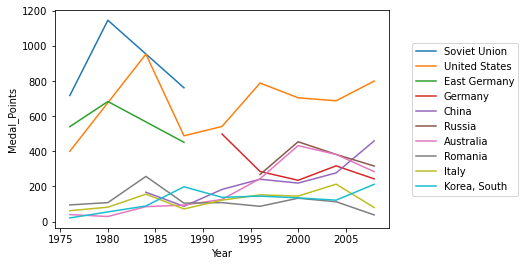

In [71]:
sns.lineplot(x='Year', y='Medal_Points', hue = 'Country', data=anualpts[anualpts['Country'].isin(list(totalpts.Country[:10]))])
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))


In [ ]:
top = 10
df['Country'].value_counts()[:top]